# **1. Nhập dữ liệu**

In [355]:
# Cài đặt các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer       
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, chi2

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [356]:
## Nhập dữ liệu
df = pd.read_csv('customer_purchase_data.csv')

df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [403]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1388 non-null   int64  
 1   Gender              1388 non-null   int64  
 2   AnnualIncome        1388 non-null   float64
 3   NumberOfPurchases   1388 non-null   int64  
 4   ProductCategory     1388 non-null   int64  
 5   TimeSpentOnWebsite  1388 non-null   float64
 6   LoyaltyProgram      1388 non-null   int64  
 7   DiscountsAvailed    1388 non-null   int64  
 8   PurchaseStatus      1388 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 108.4 KB


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,43.939481,0.501441,84699.045444,10.548991,2.002882,30.747545,0.333573,2.609510,0.466859
std,15.487533,0.500178,37541.136478,5.869383,1.422851,16.976852,0.471659,1.699984,0.499080
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.000000
25%,30.750000,0.000000,53766.895806,6.000000,1.000000,16.379635,0.000000,1.000000,0.000000
50%,44.000000,1.000000,84625.292873,11.000000,2.000000,31.213146,0.000000,3.000000,0.000000
75%,57.000000,1.000000,117188.207975,15.000000,3.000000,44.666368,1.000000,4.000000,1.000000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.000000


In [404]:
# Loại bỏ các dữ liệu trùng lặp
df.drop_duplicates(inplace=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1388 non-null   int64  
 1   Gender              1388 non-null   int64  
 2   AnnualIncome        1388 non-null   float64
 3   NumberOfPurchases   1388 non-null   int64  
 4   ProductCategory     1388 non-null   int64  
 5   TimeSpentOnWebsite  1388 non-null   float64
 6   LoyaltyProgram      1388 non-null   int64  
 7   DiscountsAvailed    1388 non-null   int64  
 8   PurchaseStatus      1388 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 108.4 KB


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,43.939481,0.501441,84699.045444,10.548991,2.002882,30.747545,0.333573,2.609510,0.466859
std,15.487533,0.500178,37541.136478,5.869383,1.422851,16.976852,0.471659,1.699984,0.499080
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.000000
25%,30.750000,0.000000,53766.895806,6.000000,1.000000,16.379635,0.000000,1.000000,0.000000
50%,44.000000,1.000000,84625.292873,11.000000,2.000000,31.213146,0.000000,3.000000,0.000000
75%,57.000000,1.000000,117188.207975,15.000000,3.000000,44.666368,1.000000,4.000000,1.000000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.000000


# **2. Thống kê mô tả**

## Biểu đồ histogram và boxplot

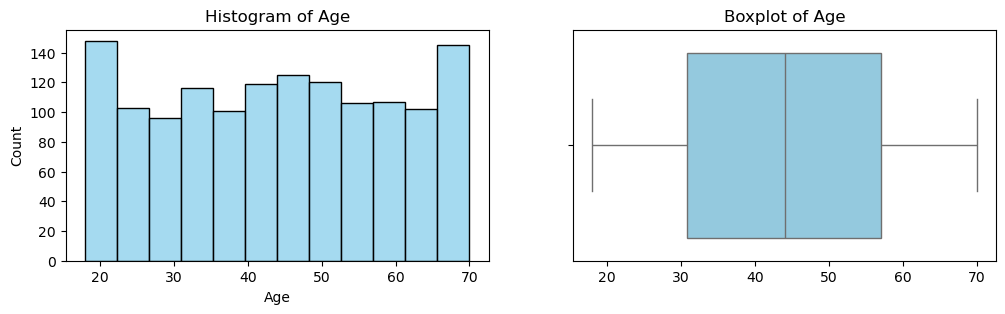

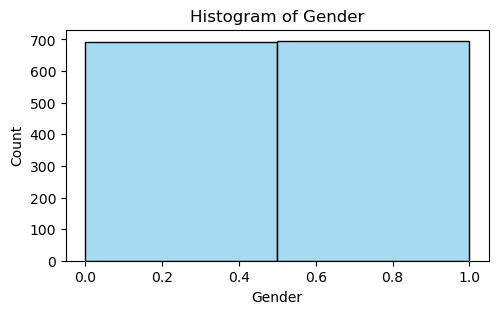

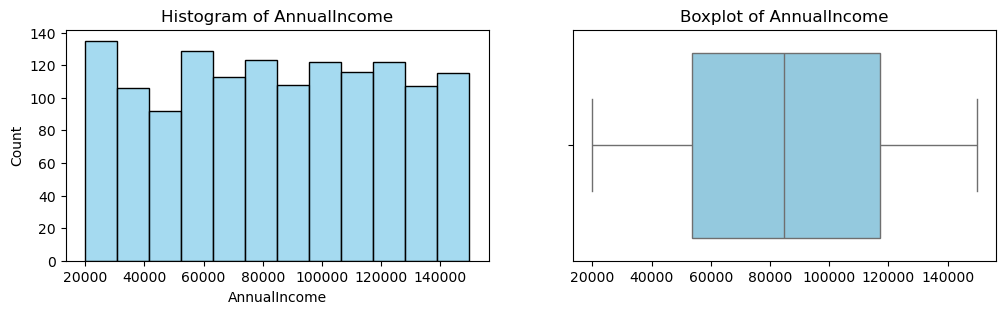

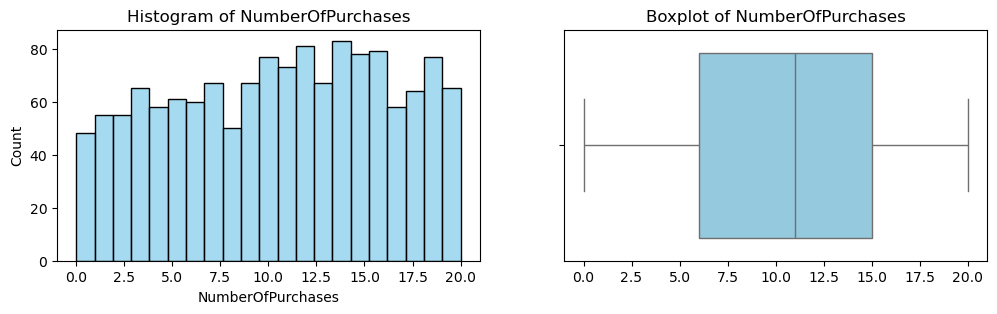

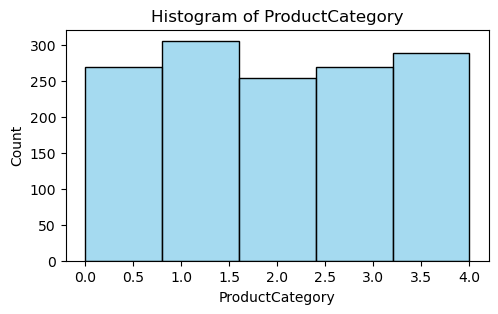

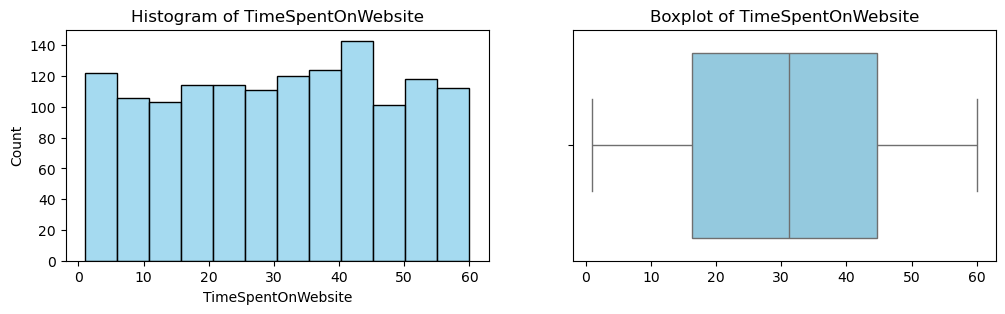

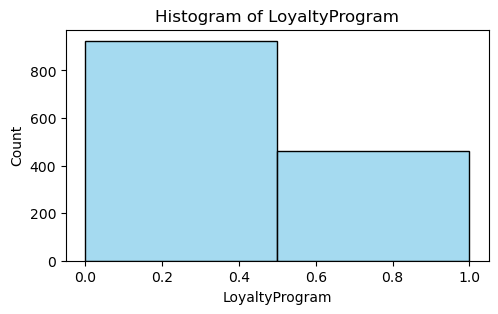

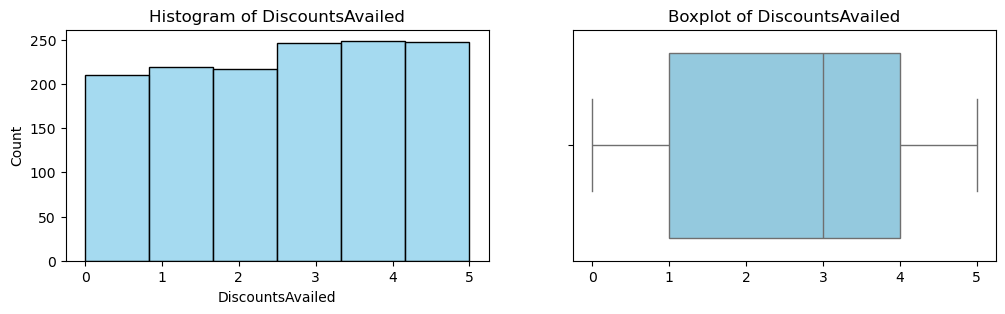

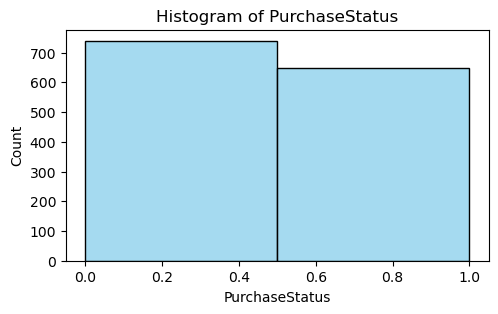

In [405]:
def plot_quantitative_var_distributions(df, var_list, bin_dict=None, no_boxplot_cols=None):    
    if no_boxplot_cols is None:
        no_boxplot_cols = ['Gender', 'ProductCategory', 'LoyaltyProgram', 'PurchaseStatus']

    for col in var_list:
        plt.figure(figsize=(12, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        if bin_dict and col in bin_dict:
            sns.histplot(data=df, x=col, bins=bin_dict[col], color='skyblue', ax=plt.gca())
        else:
            sns.histplot(data=df, x=col, color='skyblue', kde=False, ax=plt.gca())
        plt.title(f'Histogram of {col}')
        
        # Boxplot (chỉ vẽ khi col không nằm trong danh sách loại bỏ)
        if col not in no_boxplot_cols:
            plt.subplot(1, 2, 2)
            sns.boxplot(x=df[col], color='skyblue')
            plt.title(f'Boxplot of {col}')
            plt.xlabel('')

variables = df.select_dtypes(include='number').columns.tolist()

col = ['Gender', 'NumberOfPurchases', 'ProductCategory', 'LoyaltyProgram', 'DiscountsAvailed', 'PurchaseStatus']
custom_bins = df[col].nunique().to_dict()

plot_quantitative_var_distributions(df, variables, custom_bins)

Vì bộ dữ liệu không có missing value hay outlier nên trong pipeline ta không cần sử dụng Imputer

## Các biến định tính theo biến phụ thuộc

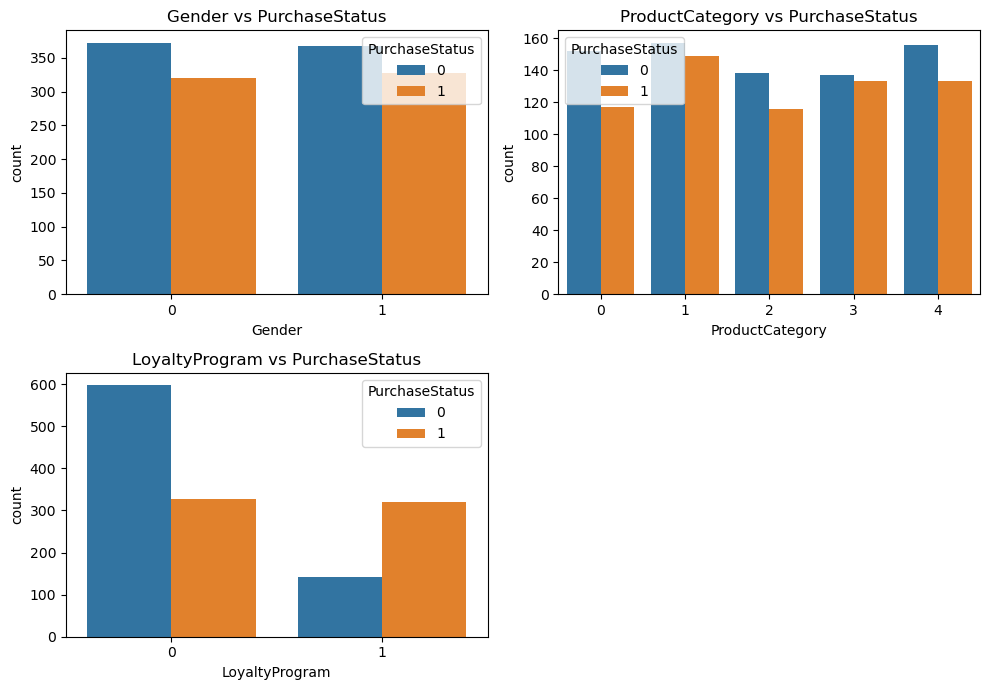

In [406]:
def plot_categorical_vs_target(df):
    plt.figure(figsize=(10, 7)) 

    # --- Subplot 1: Gender ---
    plt.subplot(2, 2, 1)  
    sns.countplot(x='Gender', hue='PurchaseStatus', data=df)
    plt.title('Gender vs PurchaseStatus')

    # --- Subplot 2: ProductCategory ---
    plt.subplot(2, 2, 2)  
    sns.countplot(x='ProductCategory', hue='PurchaseStatus', data=df)
    plt.title('ProductCategory vs PurchaseStatus')
    
    # --- Subplot 3: LoyaltyProgram ---
    plt.subplot(2, 2, 3) 
    sns.countplot(x='LoyaltyProgram', hue='PurchaseStatus', data=df)
    plt.title('LoyaltyProgram vs PurchaseStatus')

    plt.tight_layout()
    plt.show()

# Gọi hàm
plot_categorical_vs_target(df)

## Correlation heatmap

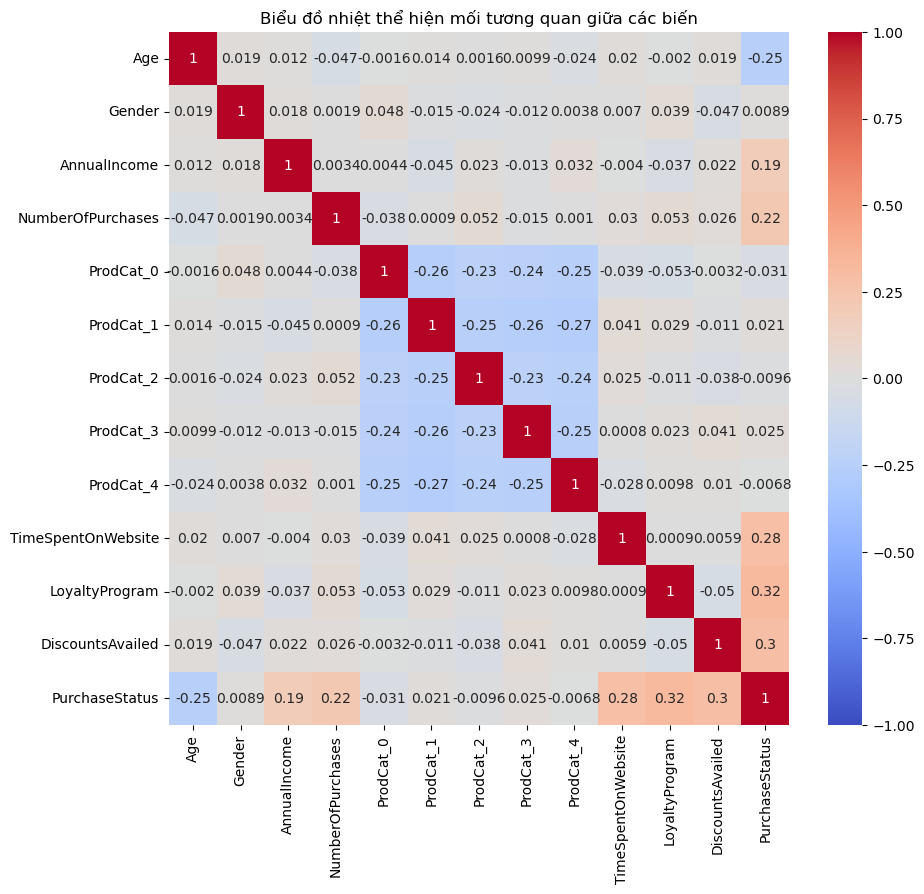

In [407]:
# Tạo dữ liệu df_corr
df_corr = df.copy()

# Tạo biến giả cho biến ProductProductCategory
col_index = df_corr.columns.get_loc("ProductCategory")
dummies = pd.get_dummies(df_corr["ProductCategory"], prefix="ProdCat")
df_corr = df_corr.drop(columns=["ProductCategory"])
df_corr = pd.concat(
    [df_corr.iloc[:, :col_index], dummies, df_corr.iloc[:, col_index:]],
    axis=1
)

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(10,9))
sns.heatmap(df_corr.corr().round(4), annot=True, cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Biểu đồ nhiệt thể hiện mối tương quan giữa các biến')
plt.show()

# **3. Sử dụng mô hình học máy**

## Tạo tập train và test

In [408]:
# Tách X (features) và y (target)
X = df.drop(['PurchaseStatus'], axis=1)
y = df['PurchaseStatus']

X.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
0,40,1,66120.267939,8,0,30.568601,0,5
1,20,1,23579.773583,4,2,38.240097,0,5
2,27,1,127821.306432,11,2,31.633212,1,0
3,24,1,137798.623120,19,3,46.167059,0,4
4,31,1,99300.964220,19,1,19.823592,0,0


In [409]:
# Thực hiện chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

print(f"Kích thước X_train: {X_train.shape}")
print(f"Kích thước X_test: {X_test.shape}")
print(f"Tỷ lệ y_train: \n{y_train.value_counts(normalize=True)}")
print(f"Tỷ lệ y_test: \n{y_test.value_counts(normalize=True)}")

Kích thước X_train: (1110, 8)
Kích thước X_test: (278, 8)
Tỷ lệ y_train: 
PurchaseStatus
0    0.533333
1    0.466667
Name: proportion, dtype: float64
Tỷ lệ y_test: 
PurchaseStatus
0    0.532374
1    0.467626
Name: proportion, dtype: float64


## Tạo Pipeline xử lý dữ liệu

In [410]:
# Xác định danh sách các cột
numeric_features = ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'DiscountsAvailed']
nominal_features = ['Gender', 'ProductCategory', 'LoyaltyProgram']

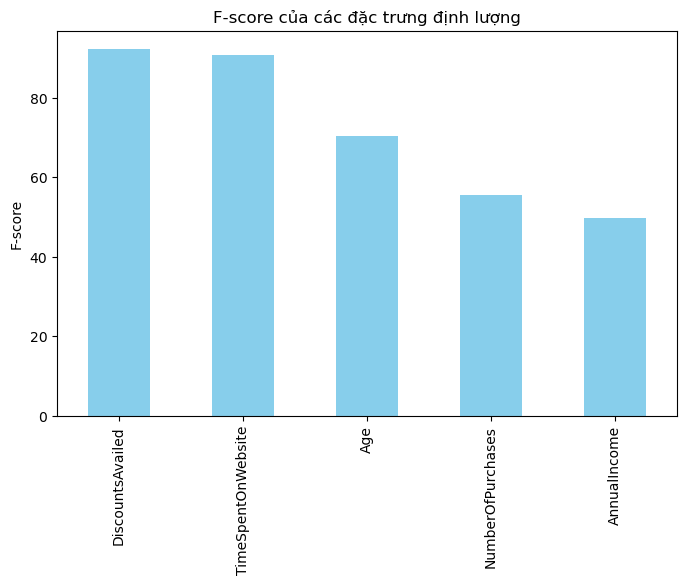

In [411]:
# score_func=f_classif: Dùng hàm f_classif (ANOVA F-test) để chấm điểm đặc trưng

# X là các đặc trưng, y là biến mục tiêu
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(StandardScaler().fit_transform(X_train[numeric_features]), y_train)

# Sắp xếp các F-score theo thứ tự giảm dần
scores = pd.Series(selector.scores_, index=X_train[numeric_features].columns)
scores = scores.sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(8,5))
scores.plot(kind='bar', color='skyblue')
plt.title('F-score của các đặc trưng định lượng')
plt.ylabel('F-score')
plt.show()

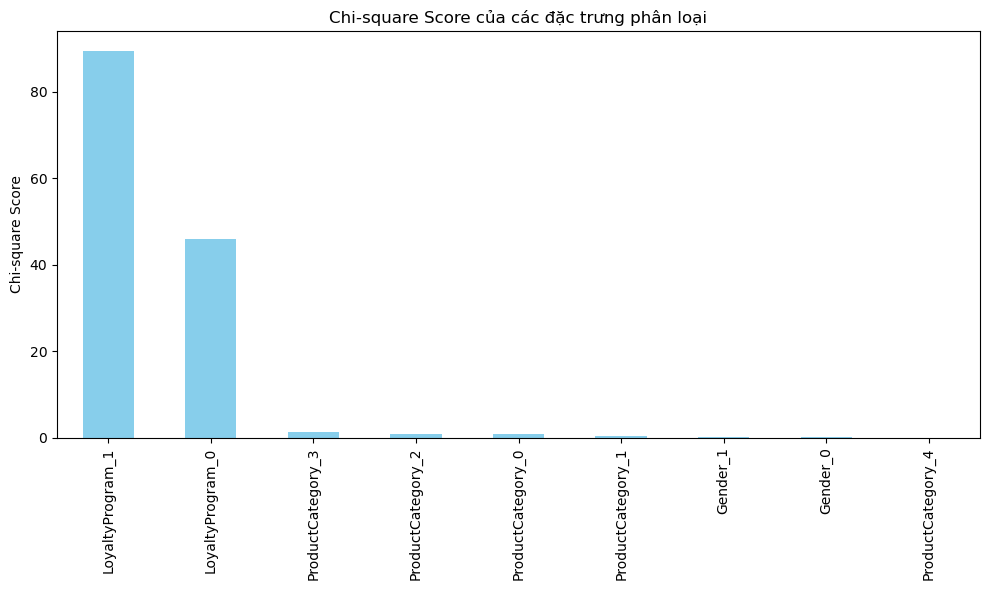

In [412]:
# --- BƯỚC 1: TẠO BIẾN GIẢ (One-Hot Encoding) ---
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit và transform dữ liệu phân loại
X_encoded = encoder.fit_transform(X_train[nominal_features])

# Lấy tên các cột mới sau khi mã hóa (Quan trọng để hiển thị trên biểu đồ)
# Ví dụ: 'Gender' -> 'Gender_Male', 'Gender_Female'
encoded_feature_names = encoder.get_feature_names_out(nominal_features)

# --- BƯỚC 2: TÍNH CHI2 SCORE ---
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_encoded, y_train)

# --- BƯỚC 3: VẼ BIỂU ĐỒ ---
# Tạo Series với chỉ mục là tên các cột mới
scores = pd.Series(selector.scores_, index=encoded_feature_names)

# Sắp xếp giảm dần
scores = scores.sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
scores.plot(kind='bar', color='skyblue')
plt.title('Chi-square Score của các đặc trưng phân loại')
plt.ylabel('Chi-square Score')
plt.tight_layout() # Tự động căn chỉnh lề
plt.show()

In [413]:
# Tạo pipeline con cho DỮ LIỆU SỐ
numeric_transformer = Pipeline(steps=[
    # StandardScaler: Chuẩn hóa dữ liệu (mean=0, std=1)
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif, k=5))
])

# Tạo pipeline con cho DỮ LIỆU HẠNG MỤC (NOMINAL)
nominal_transformer = Pipeline(steps=[
    # OneHotEncoder: Tạo biến giả
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('selector', SelectKBest(score_func=chi2, k=2))
])

# Kết hợp bằng ColumnTransformer
# ColumnTransformer nhận một danh sách các 'transformers'
# Mỗi transformer là một tuple: (tên_định_danh, pipeline_con, danh_sách_cột_áp_dụng)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat_nominal', nominal_transformer, nominal_features)]
)

In [414]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('selector',
                                                  SelectKBest(k=5))]),
                                 ['Age', 'AnnualIncome', 'NumberOfPurchases',
                                  'TimeSpentOnWebsite', 'DiscountsAvailed']),
                                ('cat_nominal',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore')),
                                                 ('selector',
                                                  SelectKBest(k=2,
                                                              score_func=<function chi2 at 0x00000279D4C91940>))]),
                                 ['Gender', 'ProductCategory',
                                  'LoyaltyProgram'])])

## Tạo Pipeline toàn diện + Sử dụng trên tập train

### Logistic Regression

In [415]:
full_pipeline_lg = Pipeline(steps=[
    # BƯỚC 1:
    ('preprocessor', preprocessor),
    
    # # BƯỚC 2: Modeling
    # LogisticRegression: Model cuối cùng để dự đoán
    ('model', LogisticRegression(random_state=42))
])

full_pipeline_lg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('selector',
                                                                   SelectKBest(k=5))]),
                                                  ['Age', 'AnnualIncome',
                                                   'NumberOfPurchases',
                                                   'TimeSpentOnWebsite',
                                                   'DiscountsAvailed']),
                                                 ('cat_nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectKBest(k=2,
                                                                               score_func=<function chi2 at 0x00000279D4C91940>))]),
                                                  ['Gender', 'ProductCategory',
                                                   'LoyaltyProgram'])])),
                ('model', LogisticRegression(random_state=42))])

In [416]:
# -- Huấn luyện và đánh giá thử nghiệm --
# Chỉ fit trên X_train
full_pipeline_lg.fit(X_train, y_train)

# Chỉ predict trên X_train
y_pred_lg = full_pipeline_lg.predict(X_train)

print(f"Accuracy trên tập Train (1 lần chia): {accuracy_score(y_train, y_pred_lg):.4f}")
print(f"Precision trên tập Train (1 lần chia): {precision_score(y_train, y_pred_lg):.4f}")
print(f"Recall trên tập Train (1 lần chia): {recall_score(y_train, y_pred_lg):.4f}")
print(f"F1-score trên tập Train (1 lần chia): {f1_score(y_train, y_pred_lg):.4f}")
print(f"AUC trên tập Train (1 lần chia): {roc_auc_score(y_train, y_pred_lg):.4f}")

Accuracy trên tập Train (1 lần chia): 0.8108
Precision trên tập Train (1 lần chia): 0.8043
Recall trên tập Train (1 lần chia): 0.7857
F1-score trên tập Train (1 lần chia): 0.7949
AUC trên tập Train (1 lần chia): 0.8092


### Decision Tree

In [417]:
full_pipeline_dt = Pipeline(steps=[
    # BƯỚC 1:
    ('preprocessor', preprocessor),
    
    # # BƯỚC 2: Modeling
    ('model', DecisionTreeClassifier(max_depth=8, random_state=42))
])

full_pipeline_dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('selector',
                                                                   SelectKBest(k=5))]),
                                                  ['Age', 'AnnualIncome',
                                                   'NumberOfPurchases',
                                                   'TimeSpentOnWebsite',
                                                   'DiscountsAvailed']),
                                                 ('cat_nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectKBest(k=2,
                                                                               score_func=<function chi2 at 0x00000279D4C91940>))]),
                                                  ['Gender', 'ProductCategory',
                                                   'LoyaltyProgram'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=8, random_state=42))])

In [418]:
# -- Huấn luyện và đánh giá thử nghiệm --
# Chỉ fit trên X_train
full_pipeline_dt.fit(X_train, y_train)

# Chỉ predict trên X_train
y_pred_dt = full_pipeline_dt.predict(X_train)

print(f"Accuracy trên tập Train (1 lần chia): {accuracy_score(y_train, y_pred_dt):.4f}")
print(f"Precision trên tập Train (1 lần chia): {precision_score(y_train, y_pred_dt):.4f}")
print(f"Recall trên tập Train (1 lần chia): {recall_score(y_train, y_pred_dt):.4f}")
print(f"F1-score trên tập Train (1 lần chia): {f1_score(y_train, y_pred_dt):.4f}")
print(f"AUC trên tập Train (1 lần chia): {roc_auc_score(y_train, y_pred_dt):.4f}")

Accuracy trên tập Train (1 lần chia): 0.9811
Precision trên tập Train (1 lần chia): 0.9863
Recall trên tập Train (1 lần chia): 0.9730
F1-score trên tập Train (1 lần chia): 0.9796
AUC trên tập Train (1 lần chia): 0.9806


### Suppor Vector Machine

In [419]:
full_pipeline_svm = Pipeline(steps=[
    # BƯỚC 1: 
    ('preprocessor', preprocessor),
    
    # # BƯỚC 2: Modeling
    ('model', SVC(kernel="rbf", C=1, probability=True, random_state=42))
])

full_pipeline_svm

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('selector',
                                                                   SelectKBest(k=5))]),
                                                  ['Age', 'AnnualIncome',
                                                   'NumberOfPurchases',
                                                   'TimeSpentOnWebsite',
                                                   'DiscountsAvailed']),
                                                 ('cat_nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectKBest(k=2,
                                                                               score_func=<function chi2 at 0x00000279D4C91940>))]),
                                                  ['Gender', 'ProductCategory',
                                                   'LoyaltyProgram'])])),
                ('model', SVC(C=1, probability=True, random_state=42))])

In [420]:
# -- Huấn luyện và đánh giá thử nghiệm --
# Chỉ fit trên X_train
full_pipeline_svm.fit(X_train, y_train)

# Chỉ predict trên X_train
y_pred_svm = full_pipeline_svm.predict(X_train)

print(f"Accuracy trên tập Train (1 lần chia): {accuracy_score(y_train, y_pred_svm):.4f}")
print(f"Precision trên tập Train (1 lần chia): {precision_score(y_train, y_pred_svm):.4f}")
print(f"Recall trên tập Train (1 lần chia): {recall_score(y_train, y_pred_svm):.4f}")
print(f"F1-score trên tập Train (1 lần chia): {f1_score(y_train, y_pred_svm):.4f}")
print(f"AUC trên tập Train (1 lần chia): {roc_auc_score(y_train, y_pred_svm):.4f}")

Accuracy trên tập Train (1 lần chia): 0.8883
Precision trên tập Train (1 lần chia): 0.8972
Recall trên tập Train (1 lần chia): 0.8591
F1-score trên tập Train (1 lần chia): 0.8777
AUC trên tập Train (1 lần chia): 0.8865


### Random Forest

In [421]:
full_pipeline_rf = Pipeline(steps=[
    # BƯỚC 1: 
    ('preprocessor', preprocessor),
    
    # # BƯỚC 2: Modeling
    ('model', RandomForestClassifier(n_estimators=50, max_depth=8, random_state=42))
])

full_pipeline_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('selector',
                                                                   SelectKBest(k=5))]),
                                                  ['Age', 'AnnualIncome',
                                                   'NumberOfPurchases',
                                                   'TimeSpentOnWebsite',
                                                   'DiscountsAvailed']),
                                                 ('cat_nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectKBest(k=2,
                                                                               score_func=<function chi2 at 0x00000279D4C91940>))]),
                                                  ['Gender', 'ProductCategory',
                                                   'LoyaltyProgram'])])),
                ('model',
                 RandomForestClassifier(max_depth=8, n_estimators=50,
                                        random_state=42))])

In [422]:
# -- Huấn luyện và đánh giá thử nghiệm --
# Chỉ fit trên X_train
full_pipeline_rf.fit(X_train, y_train)

# Chỉ predict trên X_train
y_pred_rf = full_pipeline_rf.predict(X_train)

print(f"Accuracy trên tập Train (1 lần chia): {accuracy_score(y_train, y_pred_rf):.4f}")
print(f"Precision trên tập Train (1 lần chia): {precision_score(y_train, y_pred_rf):.4f}")
print(f"Recall trên tập Train (1 lần chia): {recall_score(y_train, y_pred_rf):.4f}")
print(f"F1-score trên tập Train (1 lần chia): {f1_score(y_train, y_pred_rf):.4f}")
print(f"AUC trên tập Train (1 lần chia): {roc_auc_score(y_train, y_pred_rf):.4f}")

Accuracy trên tập Train (1 lần chia): 0.9694
Precision trên tập Train (1 lần chia): 0.9672
Recall trên tập Train (1 lần chia): 0.9672
F1-score trên tập Train (1 lần chia): 0.9672
AUC trên tập Train (1 lần chia): 0.9692


## Đánh giá Pipeline với Cross-validation

In [423]:
# Dùng cross-validation trên toàn bộ tập X và y train

# Định nghĩa chiến lược chia K-Fold 
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [424]:
#Chọn các thước đo đánh giá
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

### Logistic Regression

In [425]:
# Gọi cross_validate với TOÀN BỘ pipeline
cv_scores_lg = cross_validate(full_pipeline_lg, X_train, y_train, cv=kfold, scoring=scoring)
cv_scores_lg

{'fit_time': array([0.02019072, 0.0090692 , 0.01044226, 0.        , 0.        ]),
 'score_time': array([0.01456499, 0.01190329, 0.01283407, 0.01233649, 0.01953173]),
 'test_accuracy': array([0.78828829, 0.82882883, 0.78378378, 0.84234234, 0.79279279]),
 'test_precision': array([0.82291667, 0.81308411, 0.7979798 , 0.78378378, 0.79120879]),
 'test_recall': array([0.72477064, 0.82857143, 0.73831776, 0.8877551 , 0.72727273]),
 'test_f1': array([0.77073171, 0.82075472, 0.76699029, 0.83253589, 0.75789474]),
 'test_roc_auc': array([0.89258748, 0.89287749, 0.89272653, 0.9042133 , 0.86334894])}

In [426]:
## Tính trung bình các thang đo sau khi dùng K-fold
metrics = ["test_accuracy", "test_precision", "test_recall", "test_f1", "test_roc_auc"]

mean_cv_scores_lg = {m: np.mean(cv_scores_lg[m]).round(4) for m in metrics}
mean_cv_scores_lg

{'test_accuracy': 0.8072,
 'test_precision': 0.8018,
 'test_recall': 0.7813,
 'test_f1': 0.7898,
 'test_roc_auc': 0.8892}

In [427]:
## Độ lệch chuẩn (cho biết hiệu suất thay đổi như thế nào giữa các fold; std thấp là tốt và có nghĩa là mô hình ổn định)
std_cv_scores_lg = {m: np.std(cv_scores_lg[m]).round(4) for m in metrics}
std_cv_scores_lg

{'test_accuracy': 0.0237,
 'test_precision': 0.0143,
 'test_recall': 0.0656,
 'test_f1': 0.0306,
 'test_roc_auc': 0.0136}

### Decision Tree

In [428]:
# Gọi cross_validate với TOÀN BỘ pipeline
cv_scores_dt = cross_validate(full_pipeline_dt, X_train, y_train, cv=kfold, scoring=scoring)
cv_scores_dt

{'fit_time': array([0.0161097 , 0.01007605, 0.00800538, 0.01002336, 0.0111661 ]),
 'score_time': array([0.01071095, 0.01468754, 0.01173806, 0.01150656, 0.01011848]),
 'test_accuracy': array([0.87837838, 0.86486486, 0.86036036, 0.85585586, 0.84234234]),
 'test_precision': array([0.89423077, 0.87878788, 0.88      , 0.79464286, 0.82653061]),
 'test_recall': array([0.85321101, 0.82857143, 0.82242991, 0.90816327, 0.81818182]),
 'test_f1': array([0.87323944, 0.85294118, 0.85024155, 0.84761905, 0.82233503]),
 'test_roc_auc': array([0.84663473, 0.86092796, 0.84579439, 0.85360434, 0.85661493])}

In [429]:
## Tính trung bình các thang đo sau khi dùng K-fold
mean_cv_scores_dt = {m: np.mean(cv_scores_dt[m]).round(4) for m in metrics}
mean_cv_scores_dt

{'test_accuracy': 0.8604,
 'test_precision': 0.8548,
 'test_recall': 0.8461,
 'test_f1': 0.8493,
 'test_roc_auc': 0.8527}

In [430]:
## Độ lệch chuẩn
std_cv_scores_dt = {m: np.std(cv_scores_dt[m]).round(4) for m in metrics}
std_cv_scores_dt

{'test_accuracy': 0.0117,
 'test_precision': 0.0379,
 'test_recall': 0.0333,
 'test_f1': 0.0162,
 'test_roc_auc': 0.0058}

### Suppor Vector Machine

In [431]:
# Gọi cross_validate với TOÀN BỘ pipeline
cv_scores_svm = cross_validate(full_pipeline_svm, X, y, cv=kfold, scoring=scoring)
cv_scores_svm

{'fit_time': array([0.1179378 , 0.11602068, 0.13018131, 0.12376356, 0.11990476]),
 'score_time': array([0.02537155, 0.02352548, 0.02635336, 0.03484869, 0.02579355]),
 'test_accuracy': array([0.89208633, 0.86330935, 0.85251799, 0.86642599, 0.84837545]),
 'test_precision': array([0.88372093, 0.88      , 0.88888889, 0.90434783, 0.79285714]),
 'test_recall': array([0.88372093, 0.82706767, 0.78787879, 0.8       , 0.89516129]),
 'test_f1': array([0.88372093, 0.85271318, 0.83534137, 0.84897959, 0.84090909]),
 'test_roc_auc': array([0.94636075, 0.92724916, 0.91843088, 0.91386709, 0.92283365])}

In [432]:
## Tính trung bình các thang đo sau khi dùng K-fold
mean_cv_scores_svm = {m: np.mean(cv_scores_svm[m]).round(4) for m in metrics}
mean_cv_scores_svm

{'test_accuracy': 0.8645,
 'test_precision': 0.87,
 'test_recall': 0.8388,
 'test_f1': 0.8523,
 'test_roc_auc': 0.9257}

In [433]:
## Độ lệch chuẩn
std_cv_scores_svm = {m: np.std(cv_scores_svm[m]).round(4) for m in metrics}
std_cv_scores_svm

{'test_accuracy': 0.0153,
 'test_precision': 0.0394,
 'test_recall': 0.0434,
 'test_f1': 0.0168,
 'test_roc_auc': 0.0112}

### Random Forest

In [434]:
# Gọi cross_validate với TOÀN BỘ pipeline
cv_scores_rf = cross_validate(full_pipeline_rf, X, y, cv=kfold, scoring=scoring)
cv_scores_rf

{'fit_time': array([0.09360218, 0.06993866, 0.0750308 , 0.08325171, 0.06429672]),
 'score_time': array([0.01133966, 0.00989079, 0.01526165, 0.01649022, 0.01995325]),
 'test_accuracy': array([0.91366906, 0.92446043, 0.92446043, 0.9133574 , 0.91696751]),
 'test_precision': array([0.92      , 0.9375    , 0.944     , 0.92063492, 0.89147287]),
 'test_recall': array([0.89147287, 0.90225564, 0.89393939, 0.89230769, 0.92741935]),
 'test_f1': array([0.90551181, 0.91954023, 0.91828794, 0.90625   , 0.90909091]),
 'test_roc_auc': array([0.94719317, 0.95115375, 0.93648817, 0.9381999 , 0.93569471])}

In [435]:
## Tính trung bình các thang đo sau khi dùng K-fold
mean_cv_scores_rf = {m: np.mean(cv_scores_rf[m]).round(4) for m in metrics}
mean_cv_scores_rf

{'test_accuracy': 0.9186,
 'test_precision': 0.9227,
 'test_recall': 0.9015,
 'test_f1': 0.9117,
 'test_roc_auc': 0.9417}

In [436]:
## Độ lệch chuẩn
std_cv_scores_rf = {m: np.std(cv_scores_rf[m]).round(4) for m in metrics}
std_cv_scores_rf

{'test_accuracy': 0.005,
 'test_precision': 0.0182,
 'test_recall': 0.0135,
 'test_f1': 0.006,
 'test_roc_auc': 0.0062}

## Đánh giá cuối cùng trên tập test

### Logistic Regression

In [437]:
# -- Huấn luyện và đánh giá thử nghiệm --
# Chỉ fit trên X_train
full_pipeline_lg.fit(X_train, y_train)

# Chỉ predict trên X_test
y_pred_lg = full_pipeline_lg.predict(X_test)

print(f"Accuracy cuối cùng trên tập Test: {accuracy_score(y_test, y_pred_lg):.4f}")
print(f"Precision cuối cùng trên tập Test: {precision_score(y_test, y_pred_lg):.4f}")
print(f"Recall cuối cùng trên tập Test: {recall_score(y_test, y_pred_lg):.4f}")
print(f"F1-score cuối cùng trên tập Test: {f1_score(y_test, y_pred_lg):.4f}")
print(f"AUC cuối cùng trên tập Test: {roc_auc_score(y_test, y_pred_lg):.4f}")

Accuracy cuối cùng trên tập Test: 0.8381
Precision cuối cùng trên tập Test: 0.8244
Recall cuối cùng trên tập Test: 0.8308
F1-score cuối cùng trên tập Test: 0.8276
AUC cuối cùng trên tập Test: 0.8377


### Decision Tree

In [438]:
# -- Huấn luyện và đánh giá thử nghiệm --
# Chỉ fit trên X_train
full_pipeline_dt.fit(X_train, y_train)

# Chỉ predict trên X_test
y_pred_dt = full_pipeline_dt.predict(X_test)

print(f"Accuracy cuối cùng trên tập Test: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision cuối cùng trên tập Test: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall cuối cùng trên tập Test: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-score cuối cùng trên tập Test: {f1_score(y_test, y_pred_dt):.4f}")
print(f"AUC cuối cùng trên tập Test: {roc_auc_score(y_test, y_pred_dt):.4f}")

Accuracy cuối cùng trên tập Test: 0.8777
Precision cuối cùng trên tập Test: 0.8692
Recall cuối cùng trên tập Test: 0.8692
F1-score cuối cùng trên tập Test: 0.8692
AUC cuối cùng trên tập Test: 0.8772


### Suppor Vector Machine

In [439]:
# -- Huấn luyện và đánh giá thử nghiệm --
# Chỉ fit trên X_train
full_pipeline_svm.fit(X_train, y_train)

# Chỉ predict trên X_test
y_pred_svm = full_pipeline_svm.predict(X_test)

print(f"Accuracy cuối cùng trên tập Test: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision cuối cùng trên tập Test: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall cuối cùng trên tập Test: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-score cuối cùng trên tập Test: {f1_score(y_test, y_pred_svm):.4f}")
print(f"AUC cuối cùng trên tập Test: {roc_auc_score(y_test, y_pred_svm):.4f}")

Accuracy cuối cùng trên tập Test: 0.8669
Precision cuối cùng trên tập Test: 0.8780
Recall cuối cùng trên tập Test: 0.8308
F1-score cuối cùng trên tập Test: 0.8538
AUC cuối cùng trên tập Test: 0.8647


### Random Forest

In [440]:
# -- Huấn luyện và đánh giá thử nghiệm --
# Chỉ fit trên X_train
full_pipeline_rf.fit(X_train, y_train)

# Chỉ predict trên X_test
y_pred_rf = full_pipeline_rf.predict(X_test)

print(f"Accuracy cuối cùng trên tập Test: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision cuối cùng trên tập Test: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall cuối cùng trên tập Test: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score cuối cùng trên tập Test: {f1_score(y_test, y_pred_rf):.4f}")
print(f"AUC cuối cùng trên tập Test: {roc_auc_score(y_test, y_pred_rf):.4f}")

Accuracy cuối cùng trên tập Test: 0.9281
Precision cuối cùng trên tập Test: 0.9231
Recall cuối cùng trên tập Test: 0.9231
F1-score cuối cùng trên tập Test: 0.9231
AUC cuối cùng trên tập Test: 0.9278


## Biểu đồ ROC

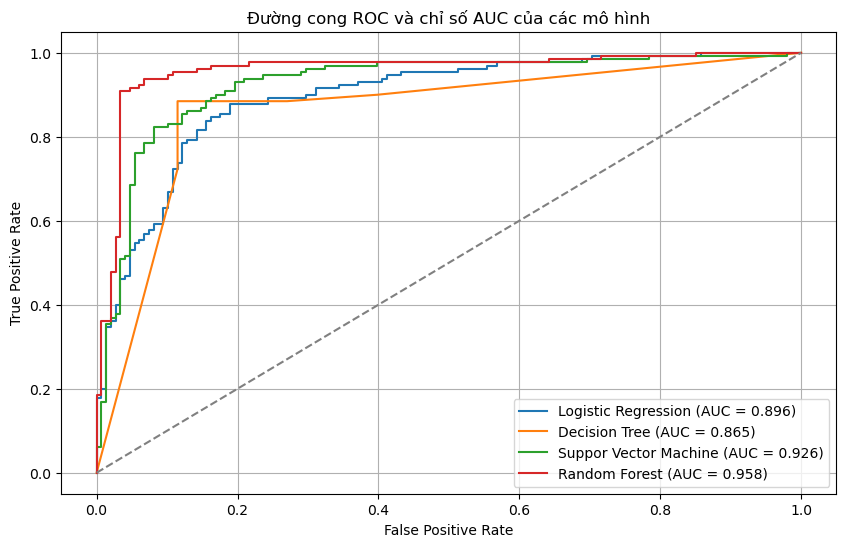

In [441]:
# Danh sách các mô hình (pipeline)
models = {
    "Logistic Regression": full_pipeline_lg,
    "Decision Tree": full_pipeline_dt,
    "Suppor Vector Machine": full_pipeline_svm,
    "Random Forest": full_pipeline_rf,
}

plt.figure(figsize=(10, 6))

for name, model in models.items():
    # Lấy xác suất lớp 1
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Tính ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    # Tính AUC
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Vẽ đường ROC
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.3f})")

# Đường chéo tham chiếu
plt.plot([0, 1], [0, 1], 'grey', linestyle='--')

# Label
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Đường cong ROC và chỉ số AUC của các mô hình')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 4. Feature Importance


 Mức độ quan trọng của các biến trong mô hình (%):
                               importance
num__TimeSpentOnWebsite         20.434167
num__Age                        17.563907
num__AnnualIncome               16.807606
num__DiscountsAvailed           16.028951
num__NumberOfPurchases          14.800094
cat_nominal__LoyaltyProgram_1    7.873616
cat_nominal__LoyaltyProgram_0    6.491657


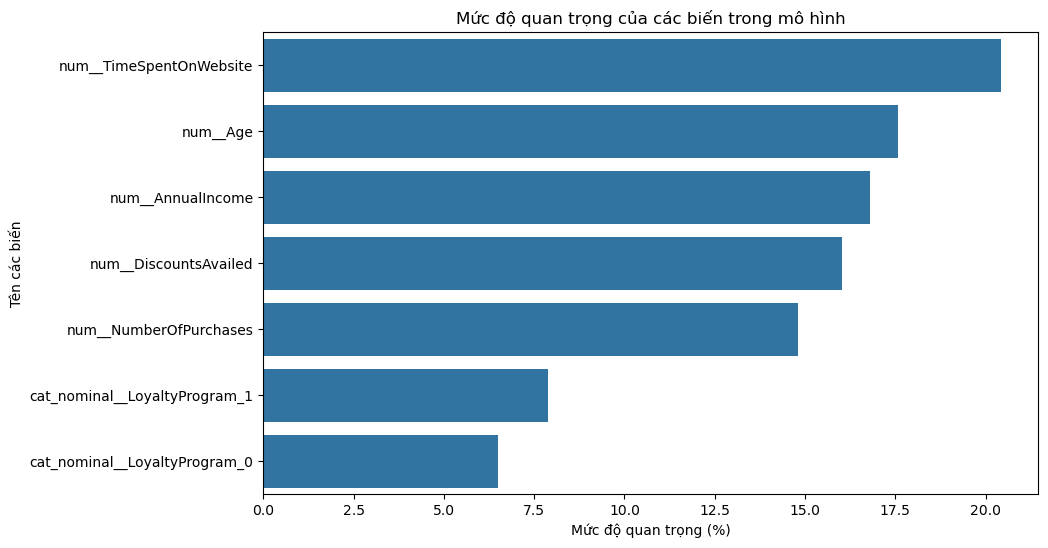

In [442]:
# Yếu tố nào quan trọng nhất dẫn đến quyết định mua hàng?
model = full_pipeline_rf.named_steps['model']
feature_names = full_pipeline_rf.named_steps["preprocessor"].get_feature_names_out()

# Tính toán % đóng góp
feature_importances = pd.DataFrame(model.feature_importances_*100,
                                   index = feature_names,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("\n Mức độ quan trọng của các biến trong mô hình (%):")
print(feature_importances)

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.ylabel('Tên các biến')
plt.xlabel('Mức độ quan trọng (%)')
plt.title('Mức độ quan trọng của các biến trong mô hình')
plt.show()